In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import time
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
from pyECLAT import ECLAT
from scipy.stats import chi2_contingency
import seaborn as sns

In [95]:
transaction_data = {
    'User': ['U1', 'U2', 'U3', 'U4', 'U5', 'U6', 'U7', 'U8', 'U9', 'U10',
             'U11', 'U12', 'U13', 'U14', 'U15', 'U16', 'U17', 'U18', 'U19', 'U20',
             'U21', 'U22', 'U23', 'U24', 'U25', 'U26', 'U27', 'U28', 'U29', 'U30',
             'U31', 'U32', 'U33', 'U34', 'U35', 'U36', 'U37', 'U38', 'U39', 'U40',
             'U41', 'U42', 'U43', 'U44', 'U45', 'U46', 'U47', 'U48', 'U49', 'U50'],
    'Funds': [['F1', 'F5', 'F9', 'F13', 'F17'],['F2', 'F6', 'F10', 'F14', 'F18'],['F3', 'F7', 'F11', 'F15', 'F19'],['F4', 'F8', 'F12', 'F16', 'F20'],['F5', 'F9', 'F13', 'F17', 'F21'],['F6', 'F10', 'F14', 'F18', 'F22'],['F6', 'F10', 'F14', 'F18', 'F22'],['F8', 'F12', 'F16', 'F20', 'F24'],['F9', 'F13', 'F17', 'F21', 'F25'],['F10', 'F14', 'F18', 'F22', 'F1'],
             ['F11', 'F15', 'F19', 'F23', 'F2'],['F12', 'F16', 'F20', 'F24', 'F3'],['F13', 'F17', 'F21', 'F25', 'F4'],['F14', 'F18', 'F22', 'F1', 'F5'],['F15', 'F19', 'F23', 'F2', 'F6'],['F16', 'F20', 'F24', 'F3', 'F7'],['F17', 'F21', 'F25', 'F4', 'F8'],['F18', 'F22', 'F1', 'F5', 'F9'],['F19', 'F23', 'F2', 'F6', 'F10'],['F20', 'F24', 'F3', 'F7', 'F11'],
             ['F21', 'F25', 'F4', 'F8', 'F12'],['F22', 'F1', 'F5', 'F9', 'F13'],['F23', 'F2', 'F6', 'F10', 'F14'],['F24', 'F3', 'F7', 'F11', 'F15'],['F25', 'F4', 'F8', 'F12', 'F16'],['F1', 'F5', 'F9', 'F13', 'F17'],['F2', 'F6', 'F10', 'F14', 'F18'],['F3', 'F7', 'F11', 'F15', 'F19'],['F4', 'F8', 'F12', 'F16', 'F20'],['F5', 'F9', 'F13', 'F17', 'F21'],
             ['F6', 'F10', 'F14', 'F18', 'F22'],['F7', 'F11', 'F15', 'F19', 'F23'],['F8', 'F12', 'F16', 'F20', 'F24'],['F9', 'F13', 'F17', 'F21', 'F25'],['F10', 'F14', 'F18', 'F22', 'F1'],['F11', 'F15', 'F19', 'F23', 'F2'],['F12', 'F16', 'F20', 'F24', 'F3'],['F13', 'F17', 'F21', 'F25', 'F4'],['F14', 'F18', 'F22', 'F1', 'F5'],['F15', 'F19', 'F23', 'F2', 'F6'],
             ['F16', 'F20', 'F24', 'F3', 'F7'],['F17', 'F21', 'F25', 'F4', 'F8'],['F18', 'F22', 'F1', 'F5', 'F9'],['F19', 'F23', 'F2', 'F6', 'F10'],['F20', 'F24', 'F3', 'F7', 'F11'],['F21', 'F25', 'F4', 'F8', 'F12'],['F22', 'F1', 'F5', 'F9', 'F13'],['F23', 'F2', 'F6', 'F10', 'F14'],['F24', 'F3', 'F7', 'F11', 'F15'],['F25', 'F4', 'F8', 'F12', 'F16']]
}

In [96]:
df = pd.DataFrame(transaction_data)
df.to_csv('MF_txn.csv', index=False)

In [97]:
df.head()

,User,Funds
0,U1,"[F1, F5, F9, F13, F17]"
1,U2,"[F2, F6, F10, F14, F18]"
2,U3,"[F3, F7, F11, F15, F19]"
3,U4,"[F4, F8, F12, F16, F20]"
4,U5,"[F5, F9, F13, F17, F21]"


In [98]:
unique_items = set()
for funds in transaction_data['Funds']:
    unique_items.update(funds)
unique_items

{'F1',
 'F10',
 'F11',
 'F12',
 'F13',
 'F14',
 'F15',
 'F16',
 'F17',
 'F18',
 'F19',
 'F2',
 'F20',
 'F21',
 'F22',
 'F23',
 'F24',
 'F25',
 'F3',
 'F4',
 'F5',
 'F6',
 'F7',
 'F8',
 'F9'}

In [99]:
fund_to_int = {fund: i for i, fund in enumerate(unique_items)}

encoded_transactions = []
for funds in transaction_data['Funds']:
    encoded_transaction = [0] * len(unique_items)
    for fund in funds:
        encoded_transaction[fund_to_int[fund]] = 1
    encoded_transactions.append(encoded_transaction)

# Create a dataframe
df = pd.DataFrame(encoded_transactions, columns=list(unique_items))
df

,F11,F4,F14,F15,F20,F23,F19,F21,F3,F16,...,F13,F1,F8,F9,F7,F18,F10,F12,F22,F25
0,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,1,0,0,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
6,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
7,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
9,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,1,0


In [100]:
df.mean()

F11    0.18
F4     0.20
F14    0.22
F15    0.18
F20    0.20
F23    0.18
F19    0.18
F21    0.20
F3     0.20
F16    0.20
F24    0.20
F5     0.20
F17    0.20
F2     0.20
F6     0.22
F13    0.20
F1     0.20
F8     0.20
F9     0.20
F7     0.18
F18    0.22
F10    0.22
F12    0.20
F22    0.22
F25    0.20
dtype: float64

In [101]:
frequent_itemsets = apriori(df, min_support=0.18, use_colnames=True)

C:\Users\janam\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [102]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

In [103]:
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(F14),(F18),0.22,0.22,0.18,0.818182,3.719008,0.1316,4.29,0.937322
1,(F18),(F14),0.22,0.22,0.18,0.818182,3.719008,0.1316,4.29,0.937322
2,(F10),(F14),0.22,0.22,0.18,0.818182,3.719008,0.1316,4.29,0.937322
3,(F14),(F10),0.22,0.22,0.18,0.818182,3.719008,0.1316,4.29,0.937322
4,(F10),(F6),0.22,0.22,0.18,0.818182,3.719008,0.1316,4.29,0.937322
5,(F6),(F10),0.22,0.22,0.18,0.818182,3.719008,0.1316,4.29,0.937322
6,(F18),(F22),0.22,0.22,0.18,0.818182,3.719008,0.1316,4.29,0.937322
7,(F22),(F18),0.22,0.22,0.18,0.818182,3.719008,0.1316,4.29,0.937322


## Correlation Analysis

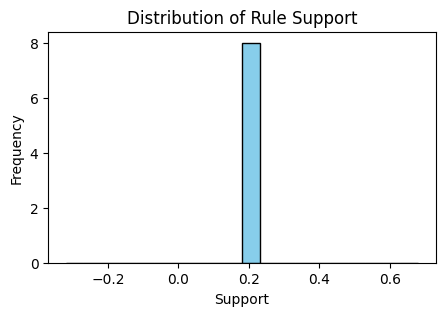

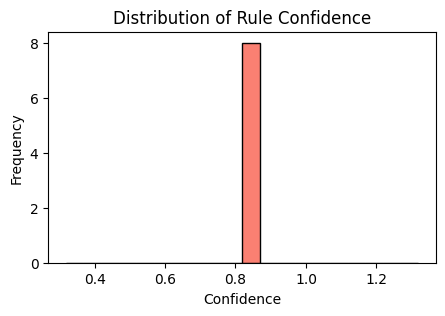

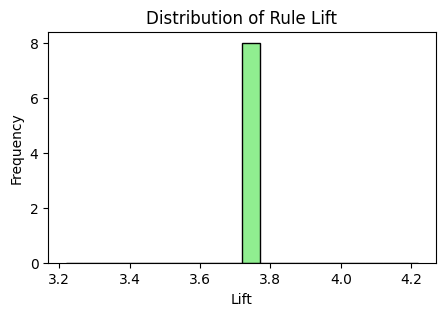

In [125]:
# Visualize distribution of support
plt.figure(figsize=(5, 3))
plt.hist(rules['support'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Support')
plt.ylabel('Frequency')
plt.title('Distribution of Rule Support')
plt.show()

# Visualize distribution of confidence
plt.figure(figsize=(5, 3))
plt.hist(rules['confidence'], bins=20, color='salmon', edgecolor='black')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.title('Distribution of Rule Confidence')
plt.show()

# Visualize distribution of lift
plt.figure(figsize=(5, 3))
plt.hist(rules['lift'], bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Lift')
plt.ylabel('Frequency')
plt.title('Distribution of Rule Lift')
plt.show()


In [104]:
itemsets_list=[]
itemsets = frequent_itemsets.itemsets
for i in range(len(itemsets)):
    x=list(itemsets[i])
    itemsets_list.append(x)

unique_funds = set()
for funds in itemsets_list:
    unique_funds.update(funds)

In [105]:
fund_to_int = {fund: i for i, fund in enumerate(unique_funds)}

encoded_transactions = []
for funds in itemsets_list:
    encoded_transaction = [0] * len(unique_funds)
    for fund in funds:
        encoded_transaction[fund_to_int[fund]] = 1
    encoded_transactions.append(encoded_transaction)

# Create a dataframe
df = pd.DataFrame(encoded_transactions, columns=list(unique_items))
df

,F11,F4,F14,F15,F20,F23,F19,F21,F3,F16,...,F13,F1,F8,F9,F7,F18,F10,F12,F22,F25
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


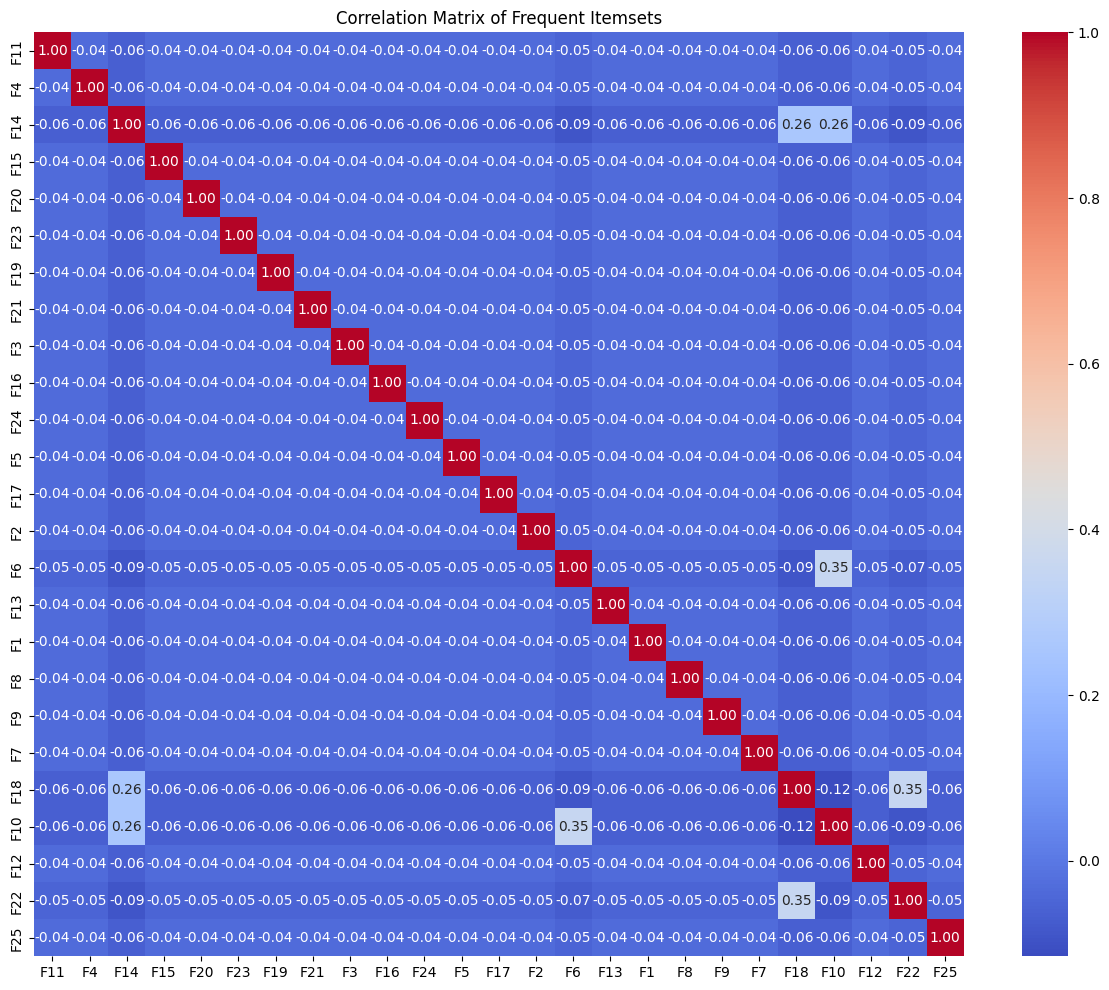

In [106]:
correlation_matrix = df.corr()

# Visualize correlation matrix
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Frequent Itemsets')
plt.show()

In [109]:
def get_recommendations(antecedent, rules, top_n=5):
    recommendations = rules[rules['antecedents'] == {antecedent}].sort_values(by='confidence', ascending=False).head(top_n)
    return recommendations
# get top recommendations for fund 'F10'
top_recommendations = get_recommendations('F10', rules)
print("Top recommendations for fund 'F10':")
print(top_recommendations[['consequents', 'confidence']])


Top recommendations for fund 'F10':
  consequents  confidence
2       (F14)    0.818182
4        (F6)    0.818182


Chi-square statistic: 0.144189677843524
p-value: 0.7041509268265415


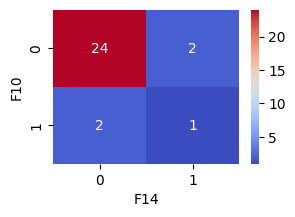

In [120]:
# Convert frequent itemsets DataFrame to contingency table
contingency_table = pd.crosstab(df['F10'],df['F14'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square statistic:", chi2)
print("p-value:", p)

plt.figure(figsize=(3,2))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt="d")
plt.show()

## Time Analysis

In [140]:
start_time = time.time()
frequent_itemsets_apriori = apriori(df, min_support=0.1, use_colnames=True)
apriori_time = time.time() - start_time

start_time = time.time()
frequent_itemsets_fpgrowth = fpgrowth(df, min_support=0.1, use_colnames=True)
fpgrowth_time = time.time() - start_time

print("Apriori time:", apriori_time)
print("FP growth tome:", fpgrowth_time)

Apriori time: 0.004525184631347656
FP growth tome: 0.0005822181701660156


C:\Users\janam\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\janam\AppData\Local\Programs\Python\Python311\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
